# TASK - 3 : PREDICTION USING DECISION TREE ALGORITHM

### by Vikram Krishna

In this task we need to create a Decision Tree classifier on IRIS dataset and visualize it graphically. Our goal is if we feed any new data to this classifier it should predict the right class accordingly.

Instead of creating a new dataset, I will split the data into train and test and then we will check whether our prediction works correctly or not.

DataSet is available at URL: https://bit.ly/3kXTdox

### So what is a Decision Tree?

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### STEP - 1 : Import all thee required libraries for analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### STEP - 2 : Load the Dataset 

In [2]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

Even if you cant find iris dataset on internet by any issue, you can directly load it from sklearn.datasets

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Now for analysis of the dataset we need to convert the dataset into a dataframe so that we can apply prediction classifier

In [1]:
df=pd.read_csv('Iris.csv')
df = df.drop(df.columns[[0]], axis=1) #removing the Id coloumn from the dataset
df.head()

NameError: name 'pd' is not defined

In [5]:
#statistics of the dataset 
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Relationship between columns of dataset

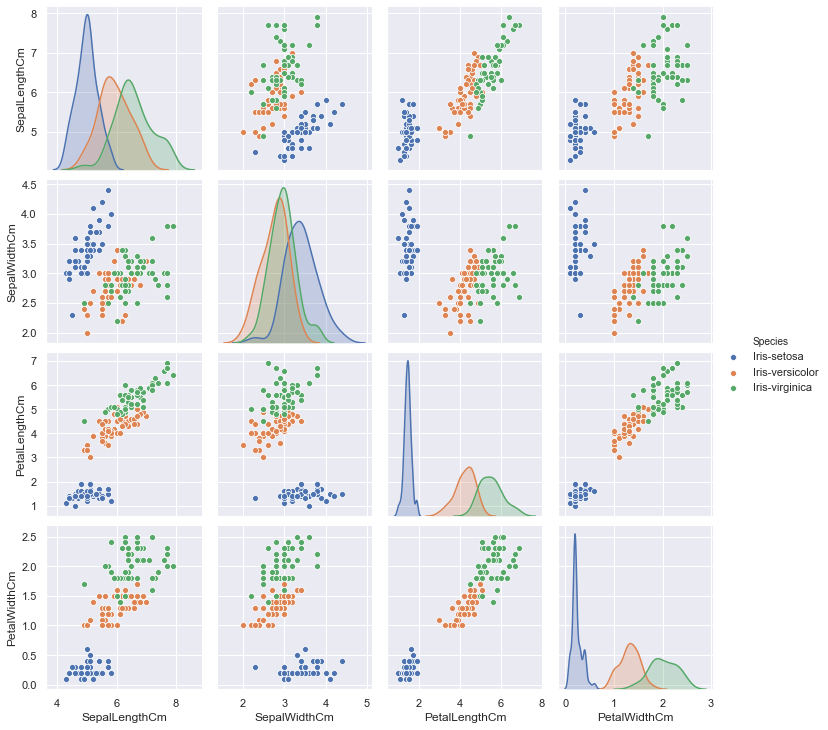

In [7]:
#Checking the relationship
sns.pairplot(df, hue='Species')

### Correlation between columns by using Heatmap

[]

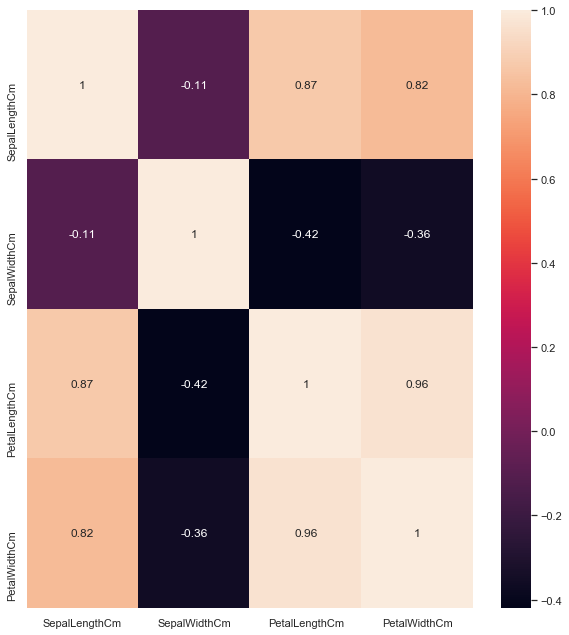

In [8]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

We can observe that petal length and petal width are most correlated

### Using boxplot to see how the “Species” is distributed with other columns

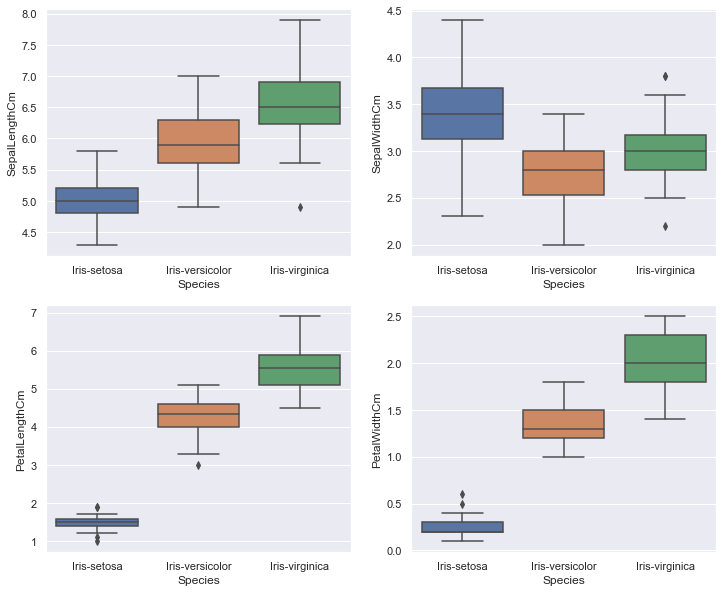

In [9]:
#boxplot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=df)

###  STEP-3 Building the Decision tree classifer

### Declare inputs and target

In [10]:
x = iris.data
y = iris.target

In [11]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split into train and test data

In [13]:
#We need to import train_test_split to split the data.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.35, random_state=1)

### Fit the decision tree classifier with Train data

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualizing the Decisiontree

Install required libraries for better visualization. we used pydotplus and graphviz

In [15]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

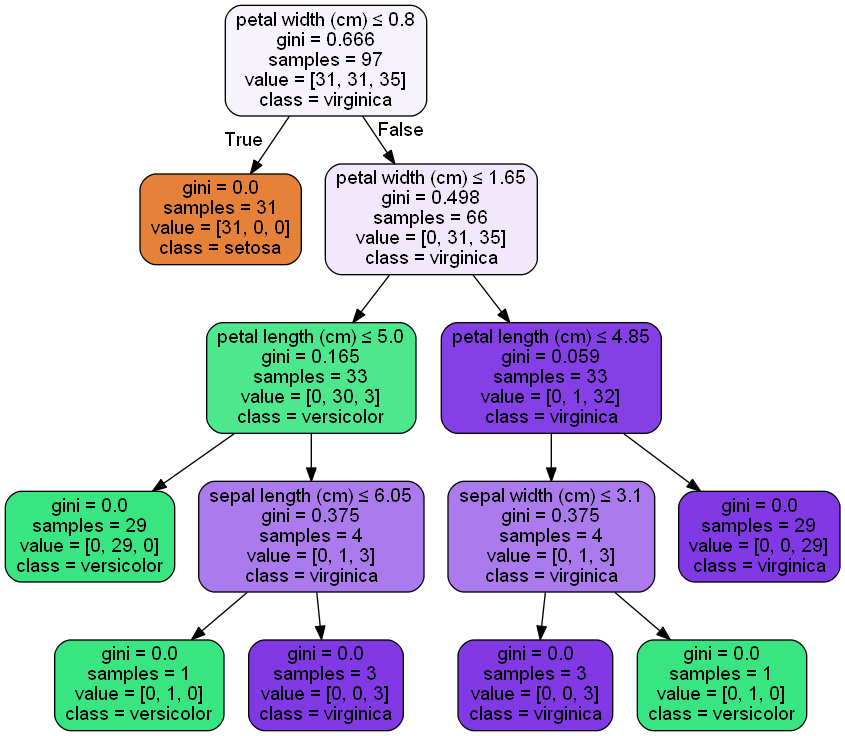

In [16]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names, class_names = iris.target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Estimating training prediciton

In [17]:
y_test1 = dtree.predict(X_train)

In [18]:
Y_train

array([2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1,
       1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
       2, 1, 2, 1, 2, 2, 1, 2, 0])

In [19]:
y_test1

array([2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1,
       1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2,
       2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0,
       2, 1, 2, 1, 2, 2, 1, 2, 0])

In [20]:
#Comparing actual vs predicted
dt_perform = pd.DataFrame({'Actual_train': Y_train, 'Predicted_train': y_test1})  
dt_perform

,Actual_train,Predicted_train
0,2,2
1,2,2
2,2,2
3,2,2
4,1,1
...,...,...
92,2,2
93,2,2
94,1,1
95,2,2


In [21]:
dt_perform['Actual_train'].value_counts()

2    35
1    31
0    31
Name: Actual_train, dtype: int64

In [22]:
dt_perform['Predicted_train'].value_counts()

2    35
1    31
0    31
Name: Predicted_train, dtype: int64

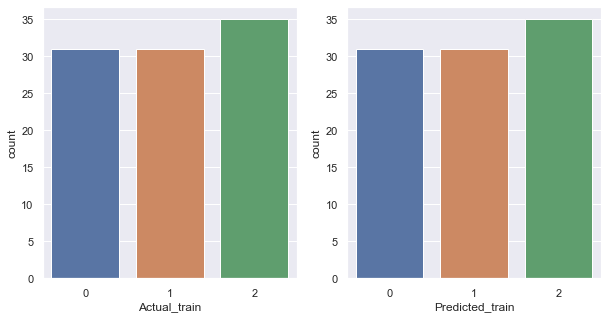

In [23]:
fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(10,5))

sns.countplot(ax=axes[0],x='Actual_train', data=dt_perform)
    
sns.countplot(ax=axes[1],x='Predicted_train', data=dt_perform)

Our training predictions are accurate

### STEP- 4 TESTING THE ALGORITHM

In [24]:
y_test2 = dtree.predict(X_test)

In [25]:
y_test2

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2])

In [26]:
Y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2])

In [27]:
dt_test= pd.DataFrame({'Actual_test': Y_test, 'Predicted_test': y_test2})  
dt_test

,Actual_test,Predicted_test
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


In [28]:
dt_test['Actual_test'].value_counts()

1    19
0    19
2    15
Name: Actual_test, dtype: int64

In [29]:
dt_test['Predicted_test'].value_counts()

1    19
0    19
2    15
Name: Predicted_test, dtype: int64

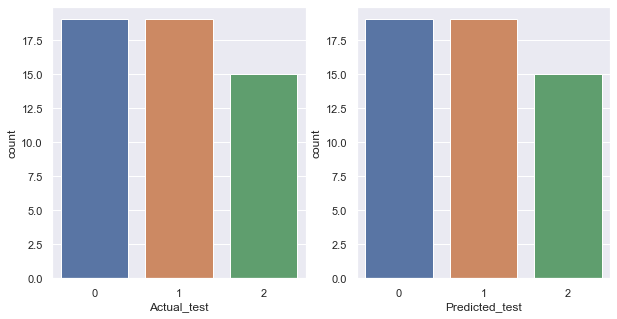

In [30]:
fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(10,5))

sns.countplot(ax=axes[0],x='Actual_test',data=dt_test)
    
sns.countplot(ax=axes[1],x='Predicted_test', data=dt_test)

We can see there is a slight difference between actual and predicted values of our test data

### Plotting confusion matrix and calculating accuracy

In [31]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, accuracy_score
from sklearn.svm import SVC

cm = confusion_matrix(Y_test, y_test2)

print(cm)

[[19  0  0]
 [ 0 18  1]
 [ 0  1 14]]


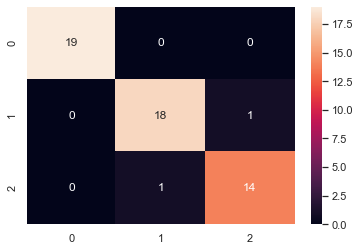

In [32]:
sns.heatmap(cm, annot=True)

In [33]:
print('Prediction Accuracy : ',accuracy_score(Y_test, y_test2))

Prediction Accuracy :  0.9622641509433962
